# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

In [1]:
def topological_sort(feed_dict):
    """
    Sort generic nodes in topological order using Kahn's Algorithm.
    `feed_dict`: A dictionary where the key is a `Input` node and the value is the respective value feed to that node.
    Returns a list of sorted nodes.
    """
    #feed_dict中键的列表
    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    #建立一个列表nodes，用来遍历所有键以及键的outputs，以此来建立字典G
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outputs:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            #将n的输出m添加到字典’n‘的’out‘中
            G[n]['out'].add(m)
            #将m的输入n添加到字典’m‘的’in‘中
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        #随机取出一个初始node
        n = S.pop()
        
        if isinstance(n, Input):
            #这个n.value的设置没懂= =
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outputs:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            #排序过程，将没有输入的node加入到S中
            if len(G[m]['in']) == 0:
                S.add(m)
    return L

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

将其输入与之权重相乘再加上偏置，然后经过激活函数得到输出

####  2. Why we use non-linear activation funcitons in neural networks?

因为经过线性激活最后得到的输出仍是wx+b的形式，说明此时经过多个神经层输出与经过一个神经元输出没有区别，失去了深度的意义

#### 3. What is the 'Logistic Loss' ?

Logistic Loss是二分类问题的目标函数，是cross entropy Loss的一个特例，能够非常合理地反映预测概率与groundtruth之间的关系。

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

虽然ReLU和tanh都比sigmoid要好，但是二分类问题应该选择sigmoid，首先其导数是非零的，且很容易计算，能够将线性得到的输出映射在0-1范围内，很好地反映了概率的概念

#### 5. Why we don't use zero initialization for all parameters ?

如果W初始化为0则对于任何输入每个隐藏层对应的每个神经元的输出都是相同的，这样无论梯度下降多少次，这些神经元都是对称的，无论隐藏层内有多少个结点，都相当于在训练同一个函数。

#### 6. Can you implement the softmax function using python ? 

In [2]:
import math

def softmax(output: list):
    total = 0
    for op in output:
        total += math.exp(op)
    return [math.exp(op)/total for op in output]

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignment will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

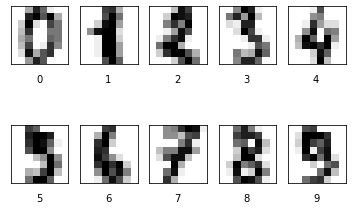

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](network.png)

In [ ]:
!pwd

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [9]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = [1 / (1 + math.exp(-zi)) for zi in z]
    s = np.array(s)
    return s

In [10]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.2-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [13]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)*0.01
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [12]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data ,shape = [m, 64]
    Y - ground truth 
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)  #shape: (m, )
    cost = -(sum([y*np.log(a) + (1-y)*np.log(1-a) for (y, a) in zip(Y.tolist(), A.tolist())]) / m)
    #(64, m) * (m, 1)
    dw = np.dot(X.T, A.reshape(-1, 1) - Y.reshape(-1, 1)) / m #shape: (64, 1)
    db = sum([a - y for (y, a) in zip(np.squeeze(Y.reshape(1, -1)), A.tolist())]) / m
        
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descent algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        if i >= 0.2 * num_iterations:
            lr = 0.2 * learning_rate
        elif i >= 0.5 * num_iterations:
            lr = 0.04 * learning_rate
        else:
            lr = learning_rate
        
        w = w - lr * dw
        b = b - lr * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    #Y_prediction = np.zeros((1, m))
    #w = w.reshape(X.shape[0],1)
    
    Y_prediction = sigmoid(np.dot(X, w) + b) 
    
    #for i in range(A.shape[i]):
    #    None 
    np.putmask(Y_prediction, Y_prediction<=0.5, 0)
    np.putmask(Y_prediction, Y_prediction>0.5, 1)
    
    assert(Y_prediction.shape == (m, ))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}
    
    w, b = initialize_parameters(X_train.shape[1])
    train_params, _, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    d['w'], d['b'] = train_params['w'], train_params['b']
    d['cost'] = costs[-1]
    
    Y_train_pred = predict(d['w'], d['b'], X_train)
    training_accuracy = sum([1 if i==j else 0 for (i, j) in zip(Y_train.tolist(), Y_train_pred.tolist())]) / Y_train.shape[0] 
    Y_test_pred = predict(d['w'], d['b'], X_test)
    
    test_accuracy = sum([1 if i==j else 0 for (i, j) in zip(Y_test.tolist(), Y_test_pred.tolist())]) / Y_test.shape[0] 
    d['training_accuracy'], d['test_accuracy'] = training_accuracy, test_accuracy
    
    return d

In [17]:
model(X_train, y_train, X_test, y_test, 5000, 0.005, True)

Cost after iteration 0: 0.767137
Cost after iteration 100: 0.304302
Cost after iteration 200: 0.282505
Cost after iteration 300: 0.273094
Cost after iteration 400: 0.268137
Cost after iteration 500: 0.265233
Cost after iteration 600: 0.263407
Cost after iteration 700: 0.262195
Cost after iteration 800: 0.261355
Cost after iteration 900: 0.260752
Cost after iteration 1000: 0.260304
Cost after iteration 1100: 0.260229
Cost after iteration 1200: 0.260157
Cost after iteration 1300: 0.260089
Cost after iteration 1400: 0.260024
Cost after iteration 1500: 0.259962
Cost after iteration 1600: 0.259904
Cost after iteration 1700: 0.259847
Cost after iteration 1800: 0.259794
Cost after iteration 1900: 0.259743
Cost after iteration 2000: 0.259694
Cost after iteration 2100: 0.259647
Cost after iteration 2200: 0.259602
Cost after iteration 2300: 0.259559
Cost after iteration 2400: 0.259517
Cost after iteration 2500: 0.259477
Cost after iteration 2600: 0.259439
Cost after iteration 2700: 0.259402
Cost

{'w': array([[-0.02054871],
        [ 0.00444713],
        [ 0.00784719],
        [ 0.01305295],
        [ 0.06460069],
        [ 0.09056077],
        [ 0.15330508],
        [-0.02323658],
        [ 0.02584346],
        [-0.10413559],
        [ 0.10649118],
        [ 0.05758667],
        [-0.04286791],
        [-0.05671993],
        [ 0.0230044 ],
        [ 0.01541091],
        [-0.01318639],
        [ 0.05050345],
        [ 0.15197533],
        [-0.04869942],
        [-0.21655863],
        [-0.02040872],
        [-0.11609053],
        [-0.03425019],
        [-0.00227978],
        [-0.17832377],
        [ 0.03930628],
        [ 0.18167031],
        [ 0.03618043],
        [ 0.145069  ],
        [-0.1480248 ],
        [-0.01306771],
        [-0.00628894],
        [-0.25055723],
        [ 0.01725585],
        [ 0.17221974],
        [-0.08712237],
        [-0.04182994],
        [ 0.02705139],
        [ 0.02078965],
        [-0.00231808],
        [-0.02002624],
        [ 0.03821348],
      

#### training_accuracy为0.908，test_accuracy为0.92，请问老师测试集比训练集还高是不是不正常？

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


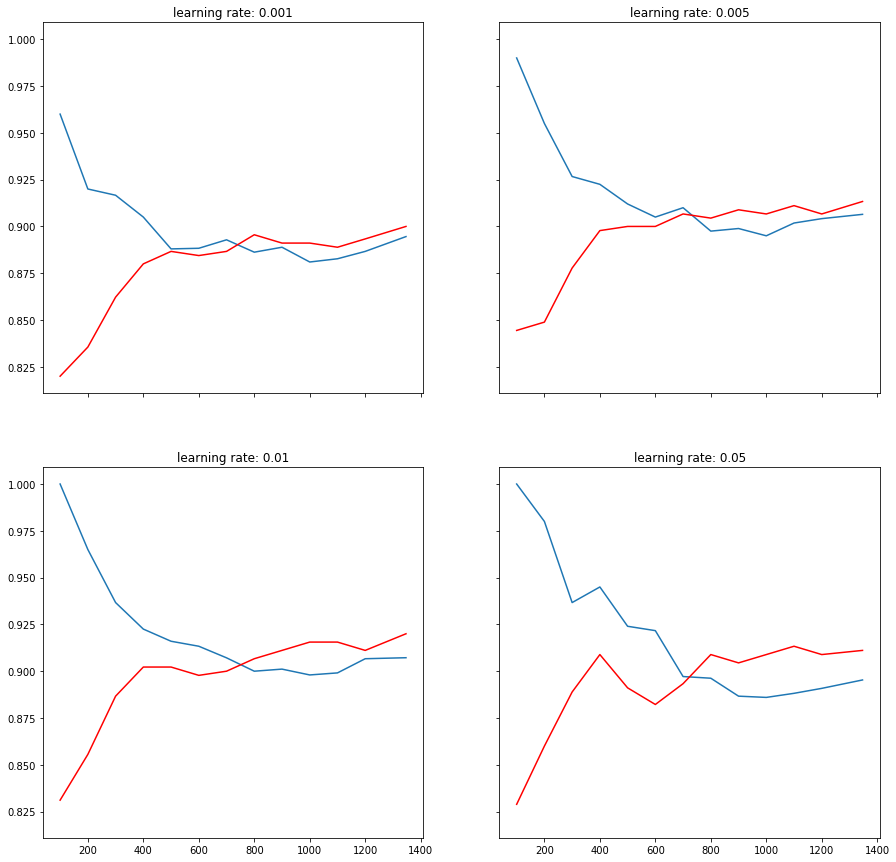

In [19]:
train_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1347]

lr_list = [0.001, 0.005, 0.01, 0.05]

fig, ax = plt.subplots(figsize=(15, 15), nrows=2, ncols=2, sharey=True, sharex=True)
axes = ax.flatten()

for i, lr in enumerate(lr_list):
    train_accuracy_list = []
    test_accuracy_list = []
    
    for size in train_size:
        d = model(X_train[:size, ], y_train[:size, ], X_test, y_test, 2000, lr, False)
        train_accuracy_list.append(d['training_accuracy'])
        test_accuracy_list.append(d['test_accuracy'])
        
    axes[i].set_title(f'learning rate: {lr}')
    axes[i].plot(train_size, train_accuracy_list)
    axes[i].plot(train_size, test_accuracy_list, color='red')

#### 还是测试集accuracy比训练集高= =

##### 4.2 Observe the effect of iteration_num on the test accuracy.

[0.8977777777777778, 0.9066666666666666, 0.9133333333333333, 0.9155555555555556, 0.92]


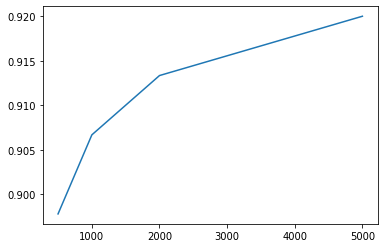

In [21]:
iteration_num_list = [500, 1000, 2000, 3000, 5000]
test_accuracy_list = []
for iteration_num in iteration_num_list:
    d = model(X_train, y_train, X_test, y_test, iteration_num, 0.005, False)
    test_accuracy_list.append(d['test_accuracy'])
print(test_accuracy_list)    
plt.plot(iteration_num_list, test_accuracy_list)

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 